#<center> **alx project**
##<center><u>**kevton traffic control**</u></center>


**By:**
* Ashaolu peter Oluwagbemiga


---

#Points to note:
* Using "RADAR Cameras" we can measure the average speed and the average acceleration of the vehicles in that particular lane at the crossing.
* Automatic Incident Detection (AID) is used to detect accidents. Its an AI-model which uses the OpenCV library to detect accidents and produces a direct output as 0/1.
* Each timer has a default value of 60sec at the starting.


**Encoding:**

Traffic Light encoding:
* L1 = RED
* L2 = YELLOW
* L3 = Green

Average Speed encoding:
* avg_speed <=20.0 --> LOW
* avg_speed >20.0 and avg_speed <=50.0 --> MEDIUM
* avg_speed >50.0 --> HIGH

Average Acceleration encoding:
* avg_acceleration <=10.0 --> LOW
* avg_acceleration >10 and avg_acceleration >=35.0 --> MEDIUM
* avg_acceleration >35.0 --> HIGH

Automatic Incident Detection (AID):
* 0 --> No accident
* 1 --> Accident Occured

Lane ID:
* Odd number laneID (R1, R3, R5, R7) -->  towards the crossing
* Even number laneID (R2, R4, R6, R8) -->  away from the crossing

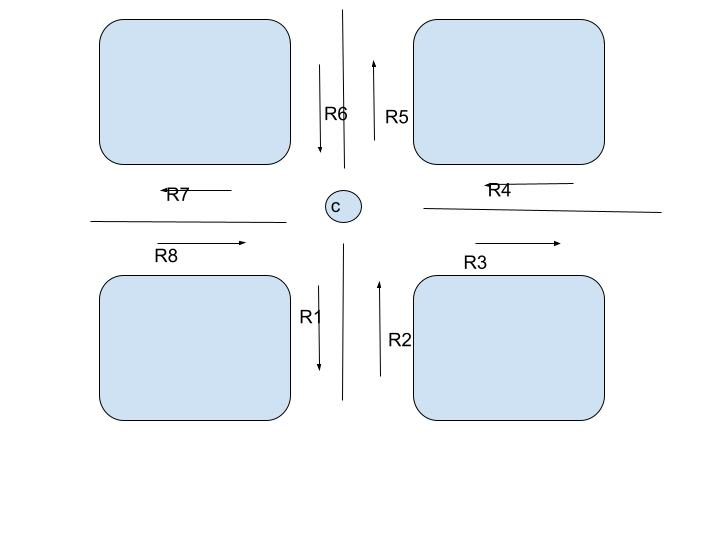

In [ ]:
from google.colab import files
upload=files.upload()

Saving traffic1.csv to traffic1.csv


In [2]:
import pandas as pd

df=pd.read_csv("traffic1.csv")
df.shape

FileNotFoundError: ignored

In [ ]:
# 96 Rows
df

NameError: ignored

##Class and objects:

In [ ]:
class Light:
  def __init__(self,light_color, timer):
    self.light_color=light_color
    self.timer=timer



In [1]:
class Crossing:
  def __init__(self, crossingID, laneID, time, avg_speed, avg_acc, textSpeed, textAcc, density, accident):
    self.crossingID=crossingID
    self.laneID=laneID
    self.time=time
    self.avg_speed=avg_speed
    self.avg_acc=avg_acc
    self.textSpeed=textSpeed
    self.textAcc=textAcc
    self.density=density
    self.accident=accident

##Context derivation and entity listing:

* <h2><b><u>Fuzzy Rule</u></b>:</h2>

<h3>1. If (Speed is Slow) and (Acceleration is Low) then (Traffic is
Medium)<br>
2. If (Speed is Slow) and (Acceleration is Medium) then (Traffic is
Medium)<br>
3. If (Speed is Slow) and (Acceleration is High) then (Traffic is
High)<br>
4. If (Speed is Medium) and (Acceleration is Low) then (Traffic is
Low)<br>
5. If (Speed is Medium) and (Acceleration is Medium) then
(Traffic is Low)<br>
6. If (Speed is Medium) and (Acceleration is High) then (Traffic
is Medium)<br>
7. If (Speed is Fast) and (Acceleration is Low) then (Traffic is
Free)<br>
8. If (Speed is Fast) and (Acceleration is Medium) then (Traffic is
Free)<br>
9. If (Speed is Fast) and (Acceleration is High) then (Traffic is
Low)
</h3>

In [ ]:
Entities = []
density="FREE"
light_color="RED"
accident="NO"

for index, row in df.iterrows():
  if(row["Current_Light_Status"]=="L1"):
      light_color = "RED"
  elif(row["Current_Light_Status"]=="L2"):
      light_color = "YELLOW"
  elif(row["Current_Light_Status"]=="L3"):
      light_color = "GREEN"
  
  lightItem=Light(light_color, row["Current_Timer"])
  if(row["Average_Speed"]<=20.0 and row["Average_Acceleration"]<=10.0):
      avg_speed="LOW"
      avg_acc="LOW"
      density="MEDIUM"
  elif(row["Average_Speed"]<=20.0 and row["Average_Acceleration"]>=10.0 and row["Average_Acceleration"]<=35.0):
      avg_speed="LOW"
      avg_acc="MEDIUM"
      density="MEDIUM"  
  elif(row["Average_Speed"]<=20.0 and row["Average_Acceleration"]>35.0):
      avg_speed="LOW"
      avg_acc="HIGH"
      density="HIGH"
  elif(row["Average_Speed"]>=20.0 and row["Average_Speed"]<=50.0 and row["Average_Acceleration"]<=10.0):
      avg_speed="MEDIUM"
      avg_acc="LOW"
      density="LOW"
  elif(row["Average_Speed"]>=20.0 and row["Average_Speed"]<=50.0 and row["Average_Acceleration"]>=10.0 and row["Average_Acceleration"]<=35.0):
      avg_speed="MEDIUM"
      avg_acc="MEDIUM"
      density="LOW" 
  elif(row["Average_Speed"]>=20.0 and row["Average_Speed"]<=50.0 and row["Average_Acceleration"]>35.0):
      avg_speed="MEDIUM"
      avg_acc="HIGH"
      density="MEDIUM"
  elif(row["Average_Speed"]>50.0 and row["Average_Acceleration"]<=10.0):
      avg_speed="HIGH"
      avg_acc="LOW"
      density="FREE"
  elif(row["Average_Speed"]>50.0 and row["Average_Acceleration"]>=10.0 and row["Average_Acceleration"]<=35.0):
      avg_speed="HIGH"
      avg_acc="MEDIUM"
      density="FREE"
  elif(row["Average_Speed"]>50.0 and row["Average_Acceleration"]>35.0):
      avg_speed="HIGH"
      avg_acc="HIGH"
      density="LOW"
  else:
      density="Error!"
  
  if(row["Automatic Incident Detection (AID)"]==0):
    accident="NO"
  else:
    accident="YES"

  
  crossingItem=Crossing(row["Crossing_Id"], row["Lane_Id"], row["Time"], row["Average_Speed"], row["Average_Acceleration"], avg_speed, avg_acc, density, accident)
  Entities.append({
      "Light":lightItem,
      "Crossing":crossingItem
  })

NameError: ignored

##<u><b>Primary Context</b></u>:





In [ ]:
start = "\033[1m"
end = "\033[0;0m"
i=0
for entity in Entities:
  i+=1
  #print(df["Current_Light_Status"][i-1])
  if i<=80:
    print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: ",entity["Crossing"].crossingID,"\nLane ID: ", entity["Crossing"].laneID,"\nCurrent Time: ",entity["Crossing"].time,"\nAverage Speed: ",entity["Crossing"].avg_speed,"\nAverage Acceleration: ", entity["Crossing"].avg_acc, "\nSignal Timer: ",entity["Light"].timer,"\nLight Status: " + str(df["Current_Light_Status"][i-1]) + "\nAccident Detected: " + str(df["Automatic Incident Detection (AID)"][i-1]) + "." +end + " ")


NameError: ignored

##<u><b>Derived Context</b></u>:





In [ ]:
start = "\033[1m"
end = "\033[0;0m"
i=0
for entity in Entities:
  i+=1
  if i<=80:
    print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: ",entity["Crossing"].crossingID,"\nLane ID: ", entity["Crossing"].laneID,"\nCurrent Time: ",entity["Crossing"].time,"\nAverage Speed: ",entity["Crossing"].textSpeed,"\nAverage Acceleration: ", entity["Crossing"].textAcc, "\nSignal Timer: ",entity["Light"].timer,"\nLight Status: " + entity["Light"].light_color + "\nAccident Detected: " + entity["Crossing"].accident + start +  "\nTraffic Congession: " + entity["Crossing"].density + "." +end + " ")




Context Scenario for ==>
Crossing:  C1 
Lane ID:  R1 
Current Time:  09:18:54 
Average Speed:  MEDIUM 
Average Acceleration:  HIGH 
Signal Timer:  50 
Light Status: GREEN
Accident Detected: YES
Traffic Congession: MEDIUM. 


Context Scenario for ==>
Crossing:  C1 
Lane ID:  R2 
Current Time:  09:18:54 
Average Speed:  MEDIUM 
Average Acceleration:  HIGH 
Signal Timer:  11 
Light Status: GREEN
Accident Detected: NO
Traffic Congession: MEDIUM. 


Context Scenario for ==>
Crossing:  C1 
Lane ID:  R3 
Current Time:  09:18:54 
Average Speed:  MEDIUM 
Average Acceleration:  HIGH 
Signal Timer:  54 
Light Status: RED
Accident Detected: NO
Traffic Congession: MEDIUM. 


Context Scenario for ==>
Crossing:  C1 
Lane ID:  R4 
Current Time:  09:18:54 
Average Speed:  MEDIUM 
Average Acceleration:  HIGH 
Signal Timer:  22 
Light Status: RED
Accident Detected: NO
Traffic Congession: MEDIUM. 


Context Scenario for ==>
Crossing:  C1 
Lane ID:  R5 
Current Time:  09:18:54 
Average Speed:  MEDIUM 
Av

---

##<u><b>Context Behaviours</b></u>:

##1. At a particular crossing, if traffic light status of one lane is green, then make the corresponding remaining traffic light status as red.
* Lane Direction: towards the crossing (odd number lane id), away from crossing (even number lane id)



In [ ]:
start = "\033[1m"
end = "\033[0;0m"

# i=0
# for entity in Entities:
#   i+=1
#   if i<=80:
#     print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: ",entity["Crossing"].crossingID,"\nLane ID: ", entity["Crossing"].laneID,"\nCurrent Time: ",entity["Crossing"].time, "\nSignal Timer: ",entity["Light"].timer,"\n" + start + "From the obtained context information, for the Crossing ID " + entity["Crossing"].crossingID + " and the Lane ID " + entity["Crossing"].laneID+ ", \nthe current light status is " + entity["Light"].light_color +"." +end + " ")

i=0
j=0
for entity in Entities:
  i+=1
  j+=1
  if j==1 and i<=80:
    print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: ",entity["Crossing"].crossingID,"\nCurrent Time: ",entity["Crossing"].time, start, "\nLane ID    Light Status", end)

  if (i<=80) and (j==1 or j==3 or j==5 or j==7):
    print(" ",entity["Crossing"].laneID,"         ",entity["Light"].light_color)

  if j==8:
    j=0
   
  



Context Scenario for ==>
Crossing:  C1 
Current Time:  09:18:54  
Lane ID    Light Status 
  R1           GREEN
  R3           RED
  R5           RED
  R7           RED


Context Scenario for ==>
Crossing:  C4 
Current Time:  03:25:30  
Lane ID    Light Status 
  R1           RED
  R3           GREEN
  R5           RED
  R7           RED


Context Scenario for ==>
Crossing:  C2 
Current Time:  19:32:57  
Lane ID    Light Status 
  R1           GREEN
  R3           RED
  R5           RED
  R7           RED


Context Scenario for ==>
Crossing:  C3 
Current Time:  14:40:02  
Lane ID    Light Status 
  R1           RED
  R3           GREEN
  R5           RED
  R7           RED


Context Scenario for ==>
Crossing:  C1 
Current Time:  12:15:44  
Lane ID    Light Status 
  R1           RED
  R3           RED
  R5           GREEN
  R7           RED


Context Scenario for ==>
Crossing:  C4 
Current Time:  17:09:12  
Lane ID    Light Status 
  R1           RED
  R3           RED
  R5          

---

##2. When traffic light timer expires, change the current traffic light status, i.e. change one color to Green->Red and another to Red->Green.




In [ ]:
start = "\033[1m"
end = "\033[0;0m"

greenCID = ""
greenLID = ""
greenDENSITY = ""
greenTIME = ""
greenCOLOR = ""
j=0
i = 0
for entity in Entities:
  i+=1  
  j+=1
  if(i==1 or i==3 or i==5 or i==7):
    if(entity["Light"].light_color == "GREEN"):
      greenCID = entity["Crossing"].crossingID
      greenLID = entity["Crossing"].laneID
      greenTIMER = 60-entity["Light"].timer
      greenTIME = entity["Crossing"].time
      greenCOLOR = entity["Light"].light_color
      x = (i-2)%8

  if i == 8:
    if j<=80:
      if(greenCOLOR == "GREEN"):
        print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: " + greenCID + "\nTime: " + greenTIME + start + "\nFrom the obtained context information at the Crossing ID " + greenCID + "; the Lane ID " + greenLID + ", where the current light status is " + greenCOLOR + " will change to RED,\nand at the Lane ID R" + str(x)  +", where the current light status is red will change to GREEN in " + str(greenTIMER) + " seconds." + end + " ")
    i = 0
    greenCID = ""
    greenLID = ""
    greenTIMER = ""
    greenTIME = ""
    greenCOLOR = ""




Context Scenario for ==>
Crossing: C1
Time: 09:18:54
From the obtained context information at the Crossing ID C1; the Lane ID R1, where the current light status is GREEN will change to RED,
and at the Lane ID R7, where the current light status is red will change to GREEN in 10 seconds. 


Context Scenario for ==>
Crossing: C4
Time: 03:25:30
From the obtained context information at the Crossing ID C4; the Lane ID R3, where the current light status is GREEN will change to RED,
and at the Lane ID R1, where the current light status is red will change to GREEN in 32 seconds. 


Context Scenario for ==>
Crossing: C2
Time: 19:32:57
From the obtained context information at the Crossing ID C2; the Lane ID R1, where the current light status is GREEN will change to RED,
and at the Lane ID R7, where the current light status is red will change to GREEN in 46 seconds. 


Context Scenario for ==>
Crossing: C3
Time: 14:40:02
From the obtained context information at the Crossing ID C3; the Lane ID R3

---

##3. If traffic density in the lane is LOW and current light status is GREEN and the respective timer is not expired, then change current light status to RED, and make the lane with HIGH traffic status as GREEN and reset the timer.



In [ ]:
start = "\033[1m"
end = "\033[0;0m"
# redTraffic = []
# greenTraffic = []
timeRemaining = 0

greenCID = ""
greenLID = ""
greenDENSITY = ""
greenTIME = ""
greenCOLOR = ""

redCID = ""
redLID = ""
redDENSITY = ""
redTIME = ""
redCOLOR = ""
i = 0
j = 0
for entity in Entities:
  i+=1
  j+=1
  # print(entity["Crossing"].crossingID + entity["Crossing"].laneID, end="")
  
  if(i==1 or i==3 or i==5 or i==7):
    if(entity["Light"].light_color == "GREEN" and (entity["Crossing"].density == "LOW" or  entity["Crossing"].density == "FREE")):
      # greenTraffic.append({"color": entity["Light"].light_color, "cid": entity["Crossing"].crossingID,"lid": entity["Crossing"].laneID, "den": entity["Crossing"].density, "timerRemain": 60-entity["Light"].timer})
      # print(greenTraffic)
      greenCID = entity["Crossing"].crossingID
      greenLID = entity["Crossing"].laneID
      greenDENSITY = entity["Crossing"].density
      greenTIME = entity["Crossing"].time
      greenCOLOR = entity["Light"].light_color

    elif(entity["Light"].light_color == "RED" and entity["Crossing"].density == "HIGH"):
      # redTraffic.append({"color": entity["Light"].light_color, "cid": entity["Crossing"].crossingID,"lid": entity["Crossing"].laneID, "den": entity["Crossing"].density, "timerRemain": 60-entity["Light"].timer})
      # print(redTraffic)
      # #print(redTraffic[0]["cid"])
      redCID = entity["Crossing"].crossingID
      redLID = entity["Crossing"].laneID
      redDENSITY = entity["Crossing"].density
      redTIME = entity["Crossing"].time
      redCOLOR = entity["Light"].light_color

  if i == 8:
    if j<=80:
      if((greenDENSITY == "LOW" or greenDENSITY == "FREE") and redDENSITY == "HIGH" and redCID == greenCID) :
        print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: " + greenCID  + "\nTime: " + greenTIME + start + "\nFrom the obtained context information at the Crossing ID " + greenCID + "; the Lane ID " + greenLID + ", where the current light status is " + greenCOLOR + " and the traffic is " + greenDENSITY + ",\nwhereas at the Lane ID " + redLID + ", where the current light status is " + redCOLOR + " and the traffic is " + redDENSITY + ".\nSo the traffic light status at " + greenLID + " where the current traffic density is LOW is changed to red and \nthe light status at " + redLID + " where the current traffic density is HIGH is changed to green and the timer is reset" + "." + end + " ")
    i = 0
    # redTraffic = []
    # greenTraffic = []
    greenCID = ""
    greenLID = ""
    greenDENSITY = ""
    greenTIME = ""
    greenCOLOR = ""

    redCID = ""
    redLID = ""
    redDENSITY = ""
    redTIME = ""
    redCOLOR = ""





Context Scenario for ==>
Crossing: C2
Time: 19:32:57
From the obtained context information at the Crossing ID C2; the Lane ID R1, where the current light status is GREEN and the traffic is LOW,
whereas at the Lane ID R7, where the current light status is RED and the traffic is HIGH.
So the traffic light status at R1 where the current traffic density is LOW is changed to red and 
the light status at R7 where the current traffic density is HIGH is changed to green and the timer is reset. 


Context Scenario for ==>
Crossing: C1
Time: 12:15:44
From the obtained context information at the Crossing ID C1; the Lane ID R5, where the current light status is GREEN and the traffic is LOW,
whereas at the Lane ID R3, where the current light status is RED and the traffic is HIGH.
So the traffic light status at R5 where the current traffic density is LOW is changed to red and 
the light status at R3 where the current traffic density is HIGH is changed to green and the timer is reset. 


Context Sc

---

##4. If traffic density in all the lane are approximately similar or in moderate limit, then traffic lights status changes based on the traffic light timer

In [ ]:
start = "\033[1m"
end = "\033[0;0m"
# redTraffic = []
# greenTraffic = []
timeRemaining = 0

greenCID = ""
greenLID = ""
greenDENSITY = ""
greenTIME = ""
greenCOLOR = ""

redCID = ""
redLID = ""
redDENSITY = ""
redTIME = ""
redCOLOR = ""
i = 0
j = 0
for entity in Entities:
  i+=1
  j+=1
  # print(entity["Crossing"].crossingID + entity["Crossing"].laneID, end="")
  
  if(i==1 or i==3 or i==5 or i==7):
    if(entity["Light"].light_color == "GREEN"):
      # greenTraffic.append({"color": entity["Light"].light_color, "cid": entity["Crossing"].crossingID,"lid": entity["Crossing"].laneID, "den": entity["Crossing"].density, "timerRemain": 60-entity["Light"].timer})
      # print(greenTraffic)
      greenCID = entity["Crossing"].crossingID
      greenLID = entity["Crossing"].laneID
      greenDENSITY = entity["Crossing"].density
      greenTIME = entity["Crossing"].time
      greenCOLOR = entity["Light"].light_color

    elif(entity["Light"].light_color == "RED" and entity["Crossing"].density == "HIGH"):
      # redTraffic.append({"color": entity["Light"].light_color, "cid": entity["Crossing"].crossingID,"lid": entity["Crossing"].laneID, "den": entity["Crossing"].density, "timerRemain": 60-entity["Light"].timer})
      # print(redTraffic)
      # #print(redTraffic[0]["cid"])
      redCID = entity["Crossing"].crossingID
      redLID = entity["Crossing"].laneID
      redDENSITY = entity["Crossing"].density
      redTIME = entity["Crossing"].time
      redCOLOR = entity["Light"].light_color
    

  if i == 8:
    if j<=80:
      if(redDENSITY != "HIGH"):
        print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: " + greenCID  + "\nTime: " + greenTIME + start  + "\nHere as the traffic density in all the lane are approximately similar or in moderate limit, so traffic lights status changes based on the default traffic light timer." + end + " ")
    
    i = 0
    # redTraffic = []
    # greenTraffic = []
    greenCID = ""
    greenLID = ""
    greenDENSITY = ""
    greenTIME = ""
    greenCOLOR = ""

    redCID = ""
    redLID = ""
    redDENSITY = ""
    redTIME = ""
    redCOLOR = ""



Context Scenario for ==>
Crossing: C1
Time: 09:18:54
Here as the traffic density in all the lane are approximately similar or in moderate limit, so traffic lights status changes based on the default traffic light timer. 


Context Scenario for ==>
Crossing: C4
Time: 03:25:30
Here as the traffic density in all the lane are approximately similar or in moderate limit, so traffic lights status changes based on the default traffic light timer. 


Context Scenario for ==>
Crossing: C3
Time: 14:40:02
Here as the traffic density in all the lane are approximately similar or in moderate limit, so traffic lights status changes based on the default traffic light timer. 


Context Scenario for ==>
Crossing: C4
Time: 17:09:12
Here as the traffic density in all the lane are approximately similar or in moderate limit, so traffic lights status changes based on the default traffic light timer. 


Context Scenario for ==>
Crossing: C3
Time: 21:34:29
Here as the traffic density in all the lane are appro

---

##5. If an accident takes place in one particular road, then people are informed that an accident took place in that particular road by blinking the yellow traffic light until the current timer expires indicating people to go slow until the issue is resolved and inform nearby traffic control station using the GPS module.



In [ ]:
start = "\033[1m"
end = "\033[0;0m"

i=0
for entity in Entities:
  i+=1
  if i<=80:
    if entity["Crossing"].accident == "YES" and entity["Light"].light_color == "GREEN":
      print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: ",entity["Crossing"].crossingID,"\nLane ID: ", entity["Crossing"].laneID,"\nCurrent Time: ",entity["Crossing"].time, "\nSignal Timer: ",entity["Light"].timer,"\nCurrent Light Status: ",entity["Light"].light_color,"\n" + start + "From the obtained context information at the Crossing ID " + entity["Crossing"].crossingID + "; the Lane ID " + entity["Crossing"].laneID+ ", where the current light status is " + entity["Light"].light_color +",\nan Accident is detected, so the current light status is changed to blinking the yellow light,\nuntil the current timer expires i.e. for", 60-entity["Light"].timer ,"sec indicating people to go slow and inform nearby traffic control station." + end + " ")
    elif entity["Crossing"].accident == "YES" and entity["Light"].light_color == "RED":
      print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: ",entity["Crossing"].crossingID,"\nLane ID: ", entity["Crossing"].laneID,"\nCurrent Time: ",entity["Crossing"].time, "\nSignal Timer: ",entity["Light"].timer,"\nCurrent Light Status: ",entity["Light"].light_color,"\n" + start + "From the obtained context information at the Crossing ID " + entity["Crossing"].crossingID + "; the Lane ID " + entity["Crossing"].laneID+ ", where the current light status is " + entity["Light"].light_color +",\nan Accident is detected, so the current light status will remain red for next 60 seconds,\nwhich will be followed by blinking the yellow traffic light and inform nearby traffic control station." + end + " ")
      



Context Scenario for ==>
Crossing:  C1 
Lane ID:  R1 
Current Time:  09:18:54 
Signal Timer:  50 
Current Light Status:  GREEN 
From the obtained context information at the Crossing ID C1; the Lane ID R1, where the current light status is GREEN,
an Accident is detected, so the current light status is changed to blinking the yellow light,
until the current timer expires i.e. for 10 sec indicating people to go slow and inform nearby traffic control station. 


Context Scenario for ==>
Crossing:  C2 
Lane ID:  R3 
Current Time:  19:32:57 
Signal Timer:  12 
Current Light Status:  RED 
From the obtained context information at the Crossing ID C2; the Lane ID R3, where the current light status is RED,
an Accident is detected, so the current light status will remain red for next 60 seconds,
which will be followed by blinking the yellow traffic light and inform nearby traffic control station. 


Context Scenario for ==>
Crossing:  C1 
Lane ID:  R3 
Current Time:  12:15:44 
Signal Timer:  36 

##<u><b>Context aware behavior with the time constraints</b></u>:


<h2>1) If traffic density in the lane is LOW and current light status is GREEN for atleast 10 seconds and the respective timer is not expired, while there is a lane with HIGH traffic density having current light status RED for atleast 10 seconds and the respective timer is not expired; then change the light status with HIGH traffic density to GREEN and LOW traffic density to RED and reset the timer.</h2>

In [ ]:
start = "\033[1m"
end = "\033[0;0m"
# redTraffic = []
# greenTraffic = []
timeRemaining = 0

greenCID = []
greenLID = []
greenDENSITY = []
greenTIME = []
greenCOLOR = []

redCID = []
redLID = []
redDENSITY = []
redTIME = []
redCOLOR = []
i = 0
j = 0
for entity in Entities:
  i+=1
  j+=1
  # print(entity["Crossing"].crossingID + entity["Crossing"].laneID, end="")
  
  if((i==1 or i==3 or i==5 or i==7) and j>=73):
    if(entity["Light"].light_color == "GREEN" and (entity["Crossing"].density == "LOW" or  entity["Crossing"].density == "FREE")):
      # greenTraffic.append({"color": entity["Light"].light_color, "cid": entity["Crossing"].crossingID,"lid": entity["Crossing"].laneID, "den": entity["Crossing"].density, "timerRemain": 60-entity["Light"].timer})
      # print(greenTraffic)
      greenCID.append(entity["Crossing"].crossingID)
      greenLID.append(entity["Crossing"].laneID)
      greenDENSITY.append(entity["Crossing"].density)
      greenTIME.append(entity["Crossing"].time)
      greenCOLOR.append(entity["Light"].light_color)


    elif(entity["Light"].light_color == "RED" and entity["Crossing"].density == "HIGH"):
      # redTraffic.append({"color": entity["Light"].light_color, "cid": entity["Crossing"].crossingID,"lid": entity["Crossing"].laneID, "den": entity["Crossing"].density, "timerRemain": 60-entity["Light"].timer})
      # print(redTraffic)
      # #print(redTraffic[0]["cid"])
      redCID.append(entity["Crossing"].crossingID)
      redLID.append(entity["Crossing"].laneID)
      redDENSITY.append(entity["Crossing"].density)
      redTIME.append(entity["Crossing"].time)
      redCOLOR.append(entity["Light"].light_color)
      
  if i == 8:
      if j==96:
         if((greenCID[0] == redCID[0] == greenCID[1] == redCID[1] == greenCID[2] == redCID[2]) and (greenDENSITY[0] == greenDENSITY[1] == greenDENSITY[2]) and (redDENSITY[0] == redDENSITY[1] == redDENSITY[2]) and (redCOLOR[0] == redCOLOR[2]) and (greenCOLOR[0] == greenCOLOR[2])):
           print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: " + greenCID[2]  + "\nTime: " + greenTIME[2] + start + "\nFrom the obtained context information at the Crossing ID " + greenCID[2] + "; the Lane ID " + greenLID[2] + ", where the current light status is " + greenCOLOR[2] + " and the traffic is " + greenDENSITY[2] + ",\nwhereas at the Lane ID " + redLID[2] + ", where the current light status is " + redCOLOR[2] + " and the traffic is " + redDENSITY[2] + ".\nSo the traffic light status at " + greenLID[2] + " where the current traffic density is LOW is changed to red and \nthe light status at " + redLID[2] + " where the current traffic density is HIGH is changed to green and the timer is reset" + "." + end + " ")
        # print(redLID[0])
        # print(greenLID[0])
      i = 0
      # redTraffic = []
      # greenTraffic = []
      





Context Scenario for ==>
Crossing: C4
Time: 10:39:28
From the obtained context information at the Crossing ID C4; the Lane ID R7, where the current light status is GREEN and the traffic is LOW,
whereas at the Lane ID R1, where the current light status is RED and the traffic is HIGH.
So the traffic light status at R7 where the current traffic density is LOW is changed to red and 
the light status at R1 where the current traffic density is HIGH is changed to green and the timer is reset. 


##2) Change the current traffic light status, i.e. change one light status to 
##   Green->Red and another to Red->Green when traffic light timer expires.




In [3]:
start = "\033[1m"
end = "\033[0;0m"

greenCID = ""
greenLID = ""
greenDENSITY = ""
greenTIME = ""
greenCOLOR = ""
j=0
i = 0
for entity in Entities:
  i+=1  
  j+=1
  if(i==1 or i==3 or i==5 or i==7):
    if(entity["Light"].light_color == "GREEN"):
      greenCID = entity["Crossing"].crossingID
      greenLID = entity["Crossing"].laneID
      greenTIMER = 60-entity["Light"].timer
      greenTIME = entity["Crossing"].time
      greenCOLOR = entity["Light"].light_color
      x = (i-2)%8

  if i == 8:
    if j<=80:
      if(greenCOLOR == "GREEN"):
        print("\n\n" + start + "Context Scenario for ==>" + end + "\nCrossing: " + greenCID + "\nTime: " + greenTIME + start + "\nFrom the obtained context information at the Crossing ID " + greenCID + "; the Lane ID " + greenLID + ", where the current light status is " + greenCOLOR + " will change to RED,\nand at the Lane ID R" + str(x)  +", where the current light status is red will change to GREEN in " + str(greenTIMER) + " seconds." + end + " ")
    i = 0
    greenCID = ""
    greenLID = ""
    greenTIMER = ""
    greenTIME = ""
    greenCOLOR = ""


NameError: ignored

---

##<u><b>Uncertainity Handling and Conflicting situations:


<h2>1) To check validity of context input:

In [ ]:
start = "\033[1m"
end = "\033[0;0m"
crossID=""
cRed=0
cYel=0
cGrn=0
time=""

print(start + "To check validity of context input: " + end)
for entity in Entities:
  if(entity["Crossing"].avg_speed<0 or entity["Crossing"].avg_acc<0  or entity["Light"].timer<0 or entity["Light"].timer>60 and (entity["Light"].light_color!="RED" or entity["Light"].light_color!="YELLOW" or entity["Light"].light_color!="GREEN")):
    print("Alert! Invalid context obtained at", entity["Crossing"].time)
  else:
    print("All Valid Context at crossing", entity["Crossing"].crossingID, "and lane ID", entity["Crossing"].laneID,"at", entity["Crossing"].time)
    


To check validity of context input: 
All Valid Context at crossing C1 and lane ID R1 at 09:18:54
All Valid Context at crossing C1 and lane ID R2 at 09:18:54
All Valid Context at crossing C1 and lane ID R3 at 09:18:54
All Valid Context at crossing C1 and lane ID R4 at 09:18:54
All Valid Context at crossing C1 and lane ID R5 at 09:18:54
All Valid Context at crossing C1 and lane ID R6 at 09:18:54
All Valid Context at crossing C1 and lane ID R7 at 09:18:54
All Valid Context at crossing C1 and lane ID R8 at 09:18:54
All Valid Context at crossing C4 and lane ID R1 at 03:25:30
All Valid Context at crossing C4 and lane ID R2 at 03:25:30
All Valid Context at crossing C4 and lane ID R3 at 03:25:30
All Valid Context at crossing C4 and lane ID R4 at 03:25:30
All Valid Context at crossing C4 and lane ID R5 at 03:25:30
All Valid Context at crossing C4 and lane ID R6 at 03:25:30
All Valid Context at crossing C4 and lane ID R7 at 03:25:30
All Valid Context at crossing C4 and lane ID R8 at 03:25:30
All

<h2>2) To check if all the lights at a particular crossing are of different colours:

In [ ]:
start = "\033[1m"
end = "\033[0;0m"
crossID=""
cRed=0
cYel=0
cGrn=0
time=""

print(start + "\nTo check if all the lights at a particular crossing are of different colours: " + end)
i=0
for entity in Entities:
  i+=1
  tcount=0
  if(crossID!=entity["Crossing"].crossingID):
    crossID=entity["Crossing"].crossingID
    time=entity["Crossing"].time
    cRed=0
    cYel=0
    cGrn=0
    i=1

  else:
    if(entity["Light"].light_color=="RED" and entity["Crossing"].time==time):
      cRed+=1
    elif(entity["Light"].light_color=="YELLOW" and entity["Crossing"].time==time):
      cYel+=1
    elif(entity["Light"].light_color=="GREEN" and entity["Crossing"].time==time):
      cGrn+=1


  if(cRed==8 or cYel==8 or cGrn==8):
    print("Alert all signals of same color! Please check", crossID, entity["Crossing"].time)
  elif(i%8==0):
    print("All lights are working correclty at", crossID, entity["Crossing"].time)



To check if all the lights at a particular crossing are of different colours: 
All lights are working correclty at C1 09:18:54
All lights are working correclty at C4 03:25:30
All lights are working correclty at C2 19:32:57
All lights are working correclty at C3 14:40:02
All lights are working correclty at C1 12:15:44
All lights are working correclty at C4 17:09:12
All lights are working correclty at C3 21:34:29
All lights are working correclty at C2 16:00:11
All lights are working correclty at C1 08:49:28
All lights are working correclty at C4 10:39:18
All lights are working correclty at C4 10:39:23
All lights are working correclty at C4 10:39:28


 <h2>3) To check if context providers are working properly or not (checking for continuous period):

In [4]:
start = "\033[1m"
end = "\033[0;0m"
crossID=""
cRed=0
cYel=0
cGrn=0
time=""

print(start + "\nTo check if context providers are working properly or not (checking for continuous period): " + end)
i=0

R1={
    "avg_speed":0,
    "avg_acc":0,
    "time":0
}
R2={
    "avg_speed":0,
    "avg_acc":0,
    "time":""
}
R3={
    "avg_speed":0,
    "avg_acc":0,
    "time":""
}
R4={
    "avg_speed":0,
    "avg_acc":0,
    "time":""
}
R5={
    "avg_speed":0,
    "avg_acc":0,
    "time":""
}
R6={
    "avg_speed":0,
    "avg_acc":0,
    "time":""
}
R7={
    "avg_speed":0,
    "avg_acc":0,
    "time":""
}
R8={
    "avg_speed":0,
    "avg_acc":0,
    "time":""
}

for entity in Entities:
  i+=1
  if(i>=73):
    if(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R1"):
      if(entity["Crossing"].time!=R1["time"] and (entity["Crossing"].avg_speed!=R1["avg_speed"] or entity["Crossing"].avg_acc!=R1["avg_acc"] )):
        R1["avg_speed"]=entity["Crossing"].avg_speed
        R1["avg_acc"]=entity["Crossing"].avg_acc
        R1["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time>R1["time"] and entity["Crossing"].avg_speed==R1["avg_speed"] and entity["Crossing"].avg_acc==R1["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R1, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R1["time"] or entity["Crossing"].time<R1["time"] ):
        print("Alert! Check R1, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R1, C4 at", entity["Crossing"].time)

    elif(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R2"):
      if(entity["Crossing"].time!=R2["time"] and (entity["Crossing"].avg_speed!=R2["avg_speed"] or entity["Crossing"].avg_acc!=R2["avg_acc"] )):
        R2["avg_speed"]=entity["Crossing"].avg_speed
        R2["avg_acc"]=entity["Crossing"].avg_acc
        R2["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time!=R2["time"] and entity["Crossing"].avg_speed==R2["avg_speed"] and entity["Crossing"].avg_acc==R2["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R2, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R2["time"]):
        print("Alert! Check R2, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R2, C4 at", entity["Crossing"].time)

    elif(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R3"):
      if(entity["Crossing"].time!=R3["time"] and (entity["Crossing"].avg_speed!=R3["avg_speed"] or entity["Crossing"].avg_acc!=R3["avg_acc"] )):
        R3["avg_speed"]=entity["Crossing"].avg_speed
        R3["avg_acc"]=entity["Crossing"].avg_acc
        R3["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time!=R3["time"] and entity["Crossing"].avg_speed==R3["avg_speed"] and entity["Crossing"].avg_acc==R3["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R3, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R3["time"]):
        print("Alert! Check R3, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R3, C4 at", entity["Crossing"].time)

    elif(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R4"):
      if(entity["Crossing"].time!=R4["time"] and (entity["Crossing"].avg_speed!=R4["avg_speed"] or entity["Crossing"].avg_acc!=R4["avg_acc"] )):
        R4["avg_speed"]=entity["Crossing"].avg_speed
        R4["avg_acc"]=entity["Crossing"].avg_acc
        R4["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time!=R4["time"] and entity["Crossing"].avg_speed==R4["avg_speed"] and entity["Crossing"].avg_acc==R4["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R4, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R4["time"]):
        print("Alert! Check R4, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R4, C4 at", entity["Crossing"].time)

    elif(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R5"):
      if(entity["Crossing"].time!=R5["time"] and (entity["Crossing"].avg_speed!=R5["avg_speed"] or entity["Crossing"].avg_acc!=R5["avg_acc"] )):
        R5["avg_speed"]=entity["Crossing"].avg_speed
        R5["avg_acc"]=entity["Crossing"].avg_acc
        R5["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time!=R5["time"] and entity["Crossing"].avg_speed==R5["avg_speed"] and entity["Crossing"].avg_acc==R5["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R5, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R5["time"]):
        print("Alert! Check R5, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R5, C4 at", entity["Crossing"].time)

    elif(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R6"):
      if(entity["Crossing"].time!=R6["time"] and (entity["Crossing"].avg_speed!=R6["avg_speed"] or entity["Crossing"].avg_acc!=R6["avg_acc"] )):
        R6["avg_speed"]=entity["Crossing"].avg_speed
        R6["avg_acc"]=entity["Crossing"].avg_acc
        R6["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time!=R6["time"] and entity["Crossing"].avg_speed==R6["avg_speed"] and entity["Crossing"].avg_acc==R6["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R6, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R6["time"]):
        print("Alert! Check R6, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R6, C4 at", entity["Crossing"].time)

    elif(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R7"):
      if(entity["Crossing"].time!=R7["time"] and (entity["Crossing"].avg_speed!=R7["avg_speed"] or entity["Crossing"].avg_acc!=R7["avg_acc"] )):
        R7["avg_speed"]=entity["Crossing"].avg_speed
        R7["avg_acc"]=entity["Crossing"].avg_acc
        R7["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time!=R7["time"] and entity["Crossing"].avg_speed==R7["avg_speed"] and entity["Crossing"].avg_acc==R7["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R7, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R7["time"]):
        print("Alert! Check R7, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R7, C4 at", entity["Crossing"].time)
    
    elif(entity["Crossing"].crossingID=="C4" and entity["Crossing"].laneID=="R8"):
      if(entity["Crossing"].time!=R8["time"] and (entity["Crossing"].avg_speed!=R8["avg_speed"] or entity["Crossing"].avg_acc!=R8["avg_acc"] )):
        R8["avg_speed"]=entity["Crossing"].avg_speed
        R8["avg_acc"]=entity["Crossing"].avg_acc
        R8["time"]=entity["Crossing"].time
      elif(entity["Crossing"].time!=R8["time"] and entity["Crossing"].avg_speed==R8["avg_speed"] and entity["Crossing"].avg_acc==R8["avg_acc"]):
        print("Alert! Check context provider: Radar Camera at R8, C4 at", entity["Crossing"].time)
      elif(entity["Crossing"].time==R8["time"]):
        print("Alert! Check R8, C4 clock at", entity["Crossing"].time)
      else:
        print("Alert! Error at R8, C4 at", entity["Crossing"].time)
    



To check if context providers are working properly or not (checking for continuous period): 


NameError: ignored

<h2>4) To check signal timer operation i.e. if max 3 lanes at any particular crossing have the same timer value:

In [ ]:
start = "\033[1m"
end = "\033[0;0m"
print(start + "\nTo check signal timer operation i.e. if max 3 lanes at any particular crossing have the same timer value: " + end)
timerCount={}
i=0
crossid=""
for entity in Entities:
  i+=1
  key = str(entity["Light"].timer)
  key1=frozenset(key)
  
  if(entity["Crossing"].crossingID!=crossid):
    crossid=entity["Crossing"].crossingID
    timerCount={}
    timerCount[key]=1
  elif key1 in timerCount:
    val=timerCount.get(key1)
    val+=1
    timerCount[key1]=val
  else:
    timerCount[key1]=1
  val=timerCount.get(key1)
  if(i%8!=1):
    if(val>2):
      print("Alert! Multiple timers with same values at", entity["Crossing"].crossingID, entity["Crossing"].time)



To check signal timer operation i.e. if max 3 lanes at any particular crossing have the same timer value: 
Alert! Multiple timers with same values at C3 14:40:02


##<u><b>Optimizing the context aware rules:

<h2>
1) Non deterministic activation fault: All the rules are deterministic, and in case such situation occurs, then prompt notify to the home admin and has already been handled in uncertainity handling.
<h2>
2) Dead Context fault: In case such situation occurs, then prompt notify to the home admin and has already been handled in uncertainity handling.
<h2>
3) Dead Decision fault: The dataset has been planned out such that no such dead contexts are there.
<h2>
4) Adaptation Race fault: Already done in uncertainty handling.
<h2>
5) Adaptation cycle fault: Has already been handled uncertainty and hardware faults.